<img src="Cohen.jpg" width="450" height="300" align="right"/>

# Word Frequency Analysis of  
# Leonard Cohen's Songs


Author: Christoph Güttner 


**Abstract**: The word frequencies of 14 Leonard Cohen songs are  
specified and visualised by the means of state of the art libraries.  
    
The common preprocessing steps -tokenizing, tagging and lemmatization-  
are done. The analysed songs are:  
Halleluja, So Long, Marianne, Anthem, Suzanne, Dance Me to the End of Love,  
Bird on the Wire, You Want It Darker, Sisters of Mercy, If It Be Your Will,  
I'm Your Man, Famous Blue Raincoat, First We Take Manhattan, Who by Fire,  
Lover, Lover, Lover 





In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

import matplotlib.pyplot as plt 
import seaborn as sns


## Import Corpus

In [21]:
Cohen_doc1 = open(r"C:\Users\Party\Documents\PythonFiles\Text Analysis\Data\LCohen\Cohen.txt" , "r")
Cohen = Cohen_doc1.readlines()
for words in Cohen[20:30]:
    print(words)

I saw a beggar leaning on his wooden crutch

He said to me, "You must not ask for so much."

And a pretty woman leaning in her darkened door

She cried to me, "Hey, why not ask for more?"

Oh like a bird on the wire



Like a drunk in a midnight choir

I have tried in my way to be free







In [28]:
Cohen_doc = open(r"C:\Users\Party\Documents\PythonFiles\Text Analysis\Data\LCohen\Cohen.txt" , "r")
content = Cohen_doc.read()



## Tokenization

### Remove Punktuation
### Remove Stopwords
### Make Lowever Case


In [29]:

#Shakespear_token = nltk.word_tokenize(content)
tokens = nltk.wordpunct_tokenize(content)
text = nltk.Text(tokens) 
words = [w.lower() for w in text if w.isalpha()]
filtered_words = [word for word in words if word not in stopwords.words('english')]


### Get Frequency

Text(0.5, 1.0, '100 most common Words in Macbeth')

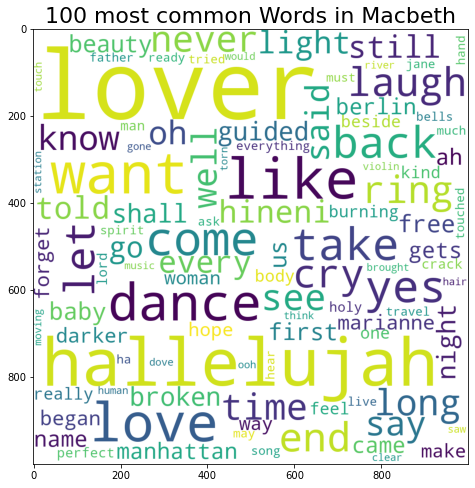

In [31]:

word_freq = Counter(filtered_words)
word_Shakes = word_freq.most_common()
word_Shakes = word_Shakes[0:100]
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(word_Shakes))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("100 most common Words in Macbeth", fontsize = 22)

In [32]:

Word, Freq =[],[]
for i in range(100):
    word= word_Shakes[0:100][i][0]
    freq= word_Shakes[0:100][i][1]
    Word.append(word)
    Freq.append(freq)

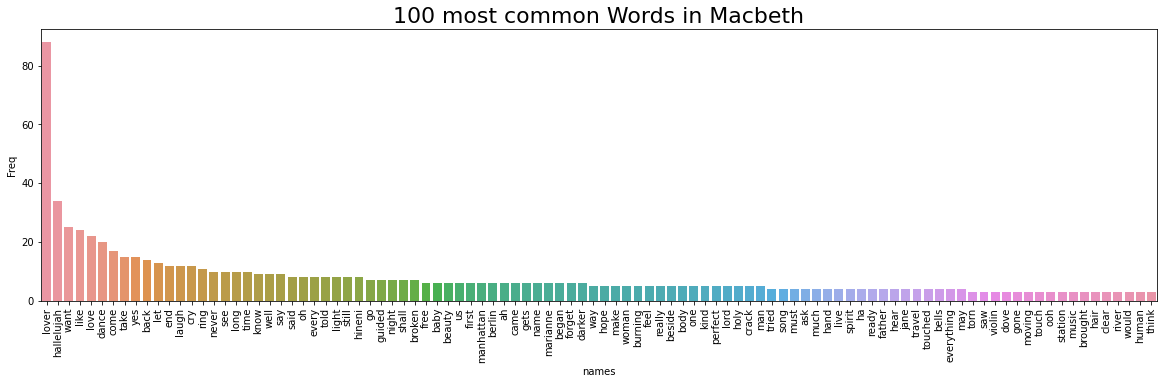

In [33]:
dictionary = {'names':Word, 'Freq':Freq}
df=pd.DataFrame(dictionary)
plt.figure(figsize=(20,5))
plt.title("100 most common Words in Macbeth", fontsize = 22)
hist = sns.barplot( x="names", y="Freq", data=df)
for item in hist.get_xticklabels():
    item.set_rotation(90)

## Verbs

In [34]:
verb_tags = ["VBD", "VBG", "VBN", "VBP", "VBZ"]

Shakespear_tokens = nltk.pos_tag(filtered_words)
verbs = []
for token, tag in Shakespear_tokens:
    if tag in verb_tags:
        verbs.append(token)


Text(0.5, 1.0, '100 most comon Verbs in Macbeth')

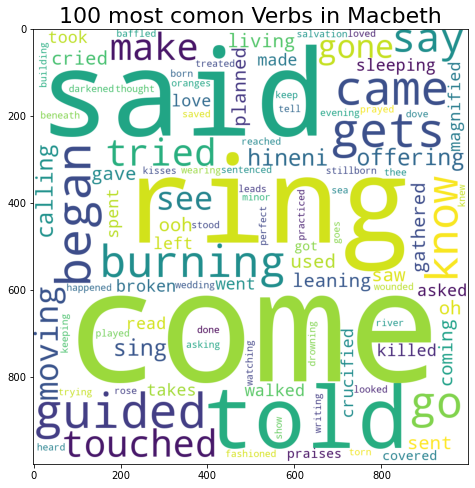

In [35]:
verb_freq = Counter(verbs)
verbs_Shakes = verb_freq.most_common()
verbs_Shakes.remove(verbs_Shakes[0])
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(verbs_Shakes[0:100]))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("100 most comon Verbs in Macbeth", fontsize = 22)

## Verb_Lemmas

In [36]:
lmtzr = nltk.stem.wordnet.WordNetLemmatizer()

verb_lemmas = []
        
for participle in verbs:
    lemma = lmtzr.lemmatize(participle, "v") 
    verb_lemmas.append(lemma)


Text(0.5, 1.0, 'Verb_Lemma in Macbeth')

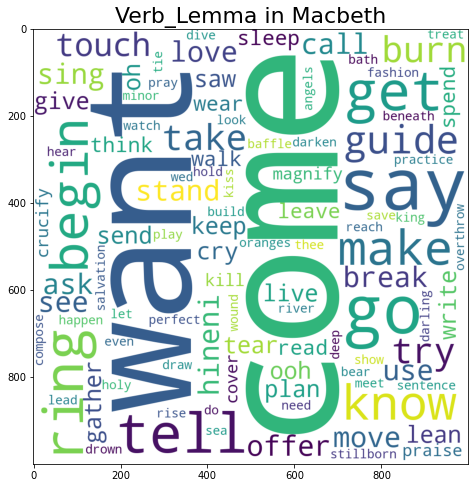

In [37]:
lemma_freq = Counter(verb_lemmas)
lemma_Shakes = lemma_freq.most_common()
lemma_Shakes=lemma_Shakes[0:100]
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(lemma_Shakes))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("Verb_Lemma in Macbeth", fontsize = 22)